<a href="https://colab.research.google.com/github/ParamitaDas18/ML_Lab_Codes/blob/main/Q15_DBSCAN_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

sample_data  weather_station_dataset.csv


DBSCAN Cluster Labels:
   Station  Cluster
0        A        0
1        B        0
2        C        1
3        D        1
4        E        0
5        F        0
6        G        1
7        H        0
8        I        0
9        J        1
10       K       -1
11       L        1

Outliers detected:
   Station  Temperature  Humidity  Rainfall  Wind Speed  Cluster
10       K           50        20         5          50       -1


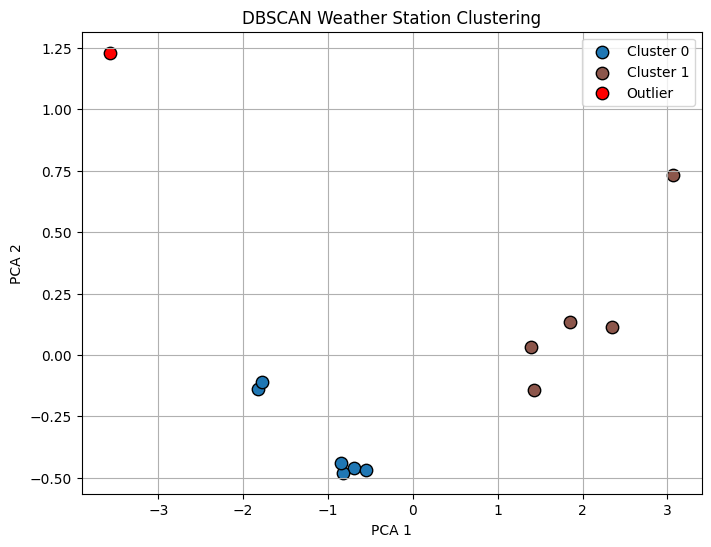

In [2]:
# --- DBSCAN Weather Station Clustering ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# 1. Create sample Weather Station dataset
data = {
    'Station': ['A','B','C','D','E','F','G','H','I','J','K','L'],
    'Temperature': [30, 29, 5, 6, 15, 16, -5, 35, 34, 3, 50, -10],
    'Humidity': [60, 62, 80, 78, 50, 52, 90, 40, 42, 85, 20, 95],
    'Rainfall': [10, 12, 50, 55, 0, 0, 70, 0, 0, 65, 5, 100],
    'Wind Speed': [15, 14, 5, 6, 20, 21, 2, 25, 26, 4, 50, 1]
}

df = pd.DataFrame(data)

# 2. Data cleaning
df = df.dropna()  # remove missing values if any
X = df[['Temperature', 'Humidity', 'Rainfall', 'Wind Speed']]

# 3. Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. DBSCAN clustering
dbscan = DBSCAN(eps=1.2, min_samples=2)
labels = dbscan.fit_predict(X_scaled)
df['Cluster'] = labels

# 5. Print results
print("DBSCAN Cluster Labels:")
print(df[['Station','Cluster']])

# 6. Identify outliers
outliers = df[df['Cluster'] == -1]
print("\nOutliers detected:")
print(outliers)

# 7. Visualize clusters (using PCA for 2D projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Outliers in red
        col = 'red'
        label = 'Outlier'
    else:
        label = f'Cluster {k}'
    class_member_mask = (labels == k)
    plt.scatter(X_pca[class_member_mask, 0],
                X_pca[class_member_mask, 1],
                c=[col],
                label=label,
                edgecolors='k',
                s=80)

plt.title('DBSCAN Weather Station Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()
